In [1]:
from tqdm import tqdm
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verified users

In [2]:
df = pd.read_csv("verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 11 columns):
uid                335018 non-null int64
name               335017 non-null object
friends            335018 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
created_at         335018 non-null object
url                269170 non-null object
avatar             332540 non-null object
location           269760 non-null object
dtypes: int64(5), object(6)
memory usage: 28.1+ MB


In [173]:
df.head(3)

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location,year,month
0,26642006,Alyssa_Milano,friends,4381,3638372,37370,59701,Thu Mar 26 00:34:20 +0000 2009,https://t.co/DOhhBYiEHZ,img/26642006.jpg,Los Angeles,2009,Mar
1,46233559,rosemcgowan,friends,4661,890406,8280,13880,Wed Jun 10 21:39:32 +0000 2009,https://t.co/hinkEjQ5ex,img/46233559.jpg,Planet 9,2009,Jun
2,44783853,HHSGov,friends,396,779017,8545,19885,Fri Jun 05 01:14:31 +0000 2009,https://t.co/T4j355Evo7,img/44783853.jpg,Washington D.C.,2009,Jun


In [168]:
pd.options.display.float_format = '{:.2f}'.format

In [171]:
df['friends_count', 'followers_count', 'listed_count', 'statuses_count'].describe()

,friends_count,followers_count,listed_count,statuses_count
count,335018.00,335018.00,335018.00,335018.00
mean,2074.95,116570.99,510.01,16671.92
std,22208.58,934332.54,6177.52,115636.65
min,0.00,0.00,0.00,0.00
25%,187.00,3092.00,44.00,1611.00
50%,532.00,10152.00,122.00,5366.00
75%,1230.00,38730.75,344.00,14881.00
max,4494592.00,108831215.00,3177668.00,50437226.00


In [95]:
fol_max = 1000000

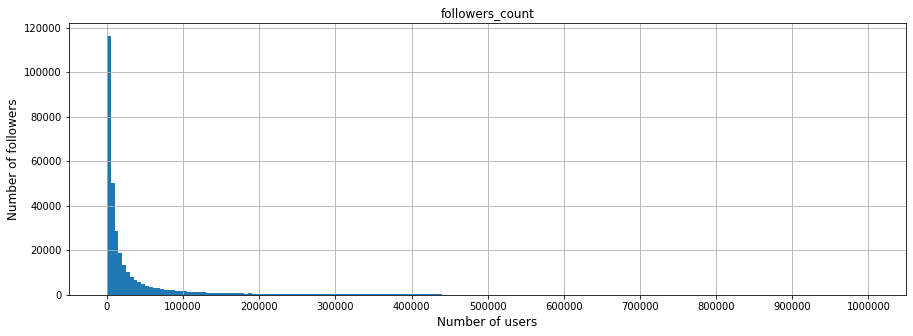

In [142]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df[df['followers_count'] < fol_max].hist(column='followers_count', bins=200, ax=ax)
plt.xticks(np.arange(0, fol_max+1, fol_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of followers",fontsize=12)

plt.show()

In [102]:
fr_max = 10000

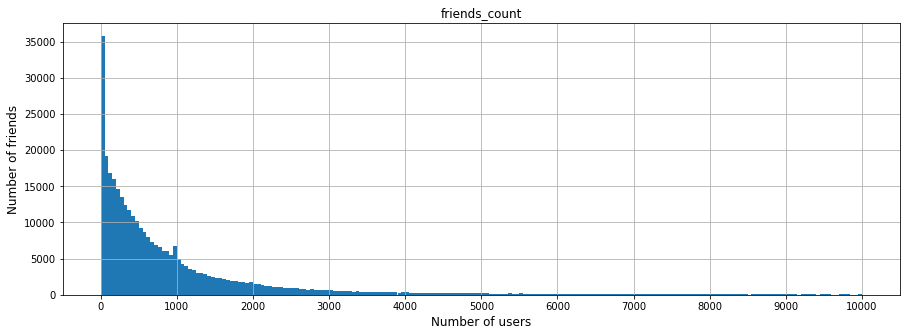

In [143]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['friends_count'] < fr_max].hist(column='friends_count', bins=200, ax=ax)
plt.xticks(np.arange(0, fr_max+1, fr_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of friends",fontsize=12)

plt.show()

In [104]:
status_max = 100000

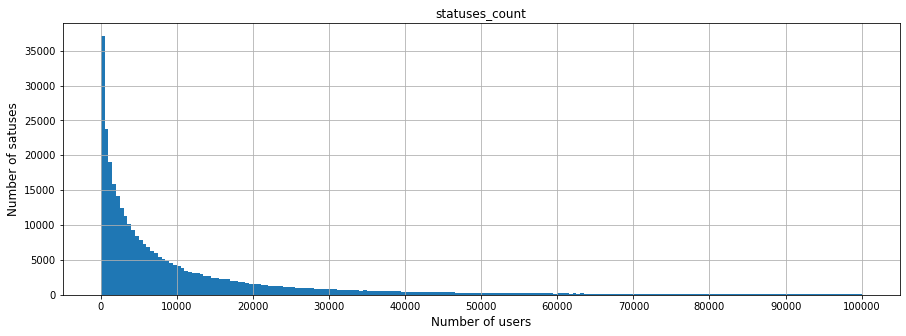

In [144]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['statuses_count'] < status_max].hist(column='statuses_count', bins=200, ax=ax)
plt.xticks(np.arange(0, status_max+1, status_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of satuses",fontsize=12)

plt.show()

In [116]:
list_max = 5000

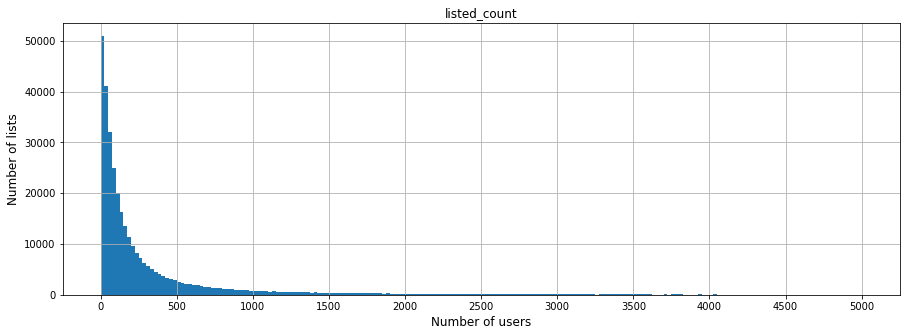

In [145]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['listed_count'] < list_max].hist(column='listed_count', bins=200, ax=ax)
plt.xticks(np.arange(0, list_max+1, list_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of lists",fontsize=12)

plt.show()

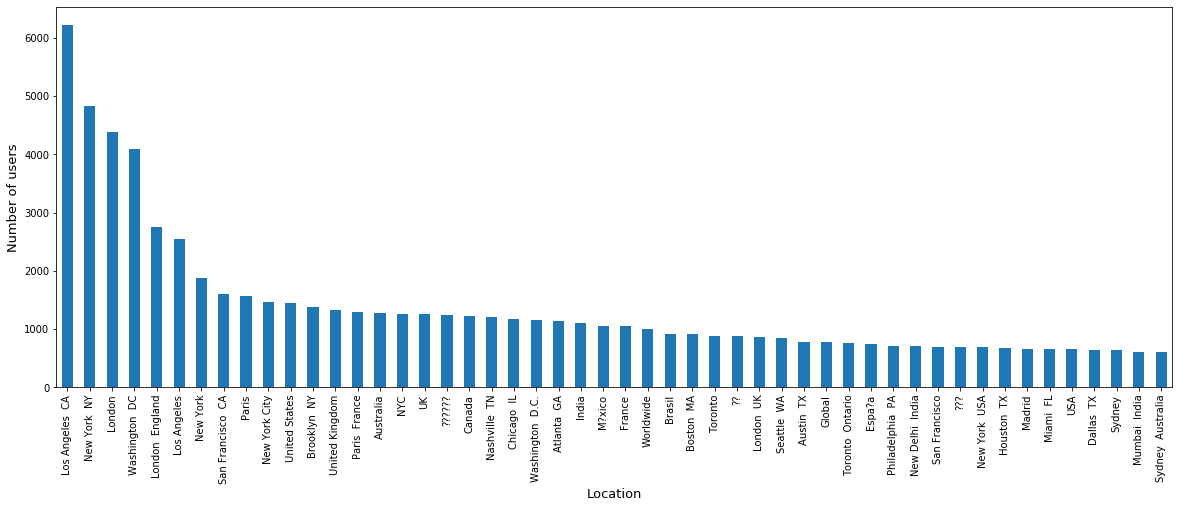

In [147]:
df["location"].value_counts()[:50].plot.bar(figsize=(20,7))

plt.xlabel("Location", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

Because of the abscence of auto-complete, a lot of the same places have different spellings, and the same cities are abrieviated in some instances but not in others. Still this chart is useful identifying some of the major cities and countries that verified users commonly reside in.

In [125]:
dates = list(df['created_at'].values)

In [126]:
created = []

for date in dates:
    created.append(date.split()[-1])

In [150]:
df['created_at'][0].split()[1]

'Mar'

In [130]:
df['year'] = created

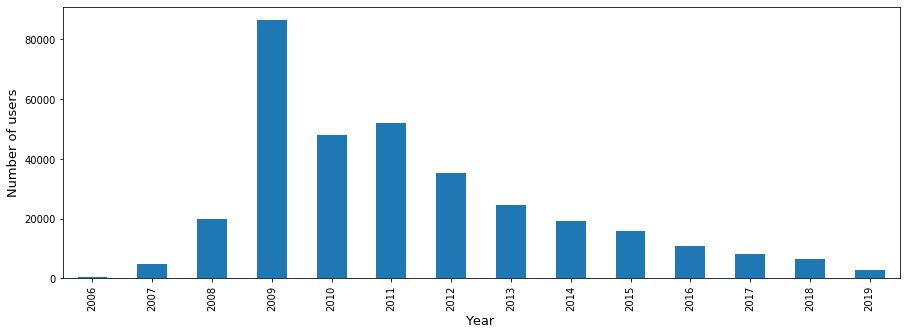

In [148]:
df['year'].groupby(df["year"]).count().plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

A big chunk verified accounts were created in 2009, which was when Twitter was most popular. Since then there has been a steady decline, and in the last two years, this may be party due to the fact that Twitter has paused public submissions for verification since early 2018.

In [151]:
months = []

for date in dates:
    months.append(date.split()[1])

In [152]:
df['month'] = months

In [154]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

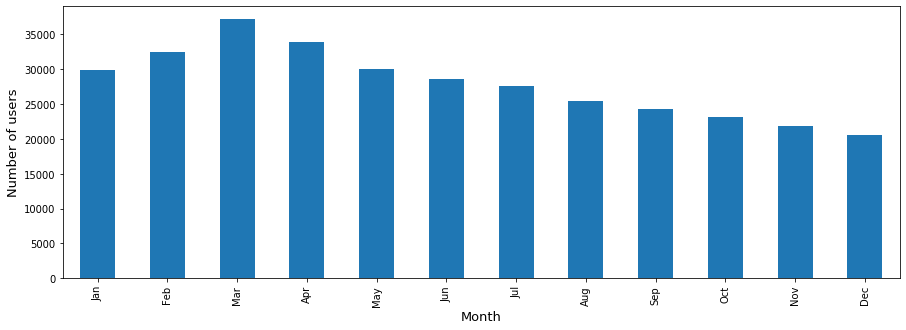

In [157]:
df['month'].groupby(df["month"]).count().loc[order].plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Month", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

# Unverified

In [2]:
df = pd.read_csv("datasets/unverified_features_500k.csv")

/home/aveek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496894 entries, 0 to 2496893
Data columns (total 24 columns):
uid                object
name               object
friends_count      object
followers_count    object
listed_count       object
statuses_count     object
pff                object
pfr                float64
gcf                float64
gcr                float64
description        object
tweets             object
friends            object
created_at         object
url                object
avatar             object
location           object
total_fake         float64
total_real         float64
net_trust          float64
total_news         float64
fake_prob          float64
net_trust_norm     float64
fake               float64
dtypes: float64(10), object(14)
memory usage: 457.2+ MB


In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559494 entries, 0 to 2496893
Data columns (total 24 columns):
uid                559481 non-null object
name               559438 non-null object
friends_count      559438 non-null object
followers_count    559418 non-null object
listed_count       559396 non-null object
statuses_count     559428 non-null object
pff                559423 non-null object
pfr                559438 non-null float64
gcf                559426 non-null float64
gcr                559426 non-null float64
description        464512 non-null object
tweets             559357 non-null object
friends            559317 non-null object
created_at         559277 non-null object
url                214612 non-null object
avatar             559175 non-null object
location           404437 non-null object
total_fake         559172 non-null float64
total_real         559172 non-null float64
net_trust          559172 non-null float64
total_news         559172 non-null float64

In [6]:
df.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,...,url,avatar,location,total_fake,total_real,net_trust,total_news,fake_prob,net_trust_norm,fake
0,1434771787,FedUpwDemsLIES,2397,3194,49,218315,1,0.0,1.0,0.0,...,NaN,https://pbs.twimg.com/profile_images/117660937...,NaN,2.0,0.0,-2.0,2.0,1.000000,-1.000000,1.0
1,83841942,elgomes15,4980,3689,53,192200,4,0.0,0.0,0.0,...,NaN,https://abs.twimg.com/sticky/default_profile_i...,Bakersfield ca,4.0,0.0,-4.0,4.0,1.000000,-1.000000,1.0
2,1126785380,trapshooter711,698,465,84,31991,5,4.0,0.0,1.0,...,NaN,https://pbs.twimg.com/profile_images/584864278...,NaN,5.0,5.0,0.0,10.0,0.500000,0.000000,1.0
3,2273244103,Tombo2014,75,41,1,17656,6,1.0,0.0,0.0,...,NaN,https://pbs.twimg.com/profile_images/420292438...,Ohio,6.0,1.0,-5.0,7.0,0.857143,-0.714286,1.0
4,555815209,vic_tracy,886,585,7,49127,2,2.0,1.0,0.0,...,NaN,https://pbs.twimg.com/profile_images/214257020...,NaN,3.0,2.0,-1.0,5.0,0.600000,-0.200000,1.0


In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
df.friends_count = pd.to_numeric(df.friends_count, errors="coerce")
df.followers_count = pd.to_numeric(df.followers_count, errors="coerce")
df.listed_count = pd.to_numeric(df.listed_count, errors="coerce")
df.statuses_count = pd.to_numeric(df.statuses_count, errors="coerce")

df = df.dropna(subset=["friends_count", "followers_count", "listed_count", "statuses_count"])
df = df.astype({"friends_count": int, "followers_count": int, "listed_count": int, "statuses_count": int})

In [9]:
# df[["friends_count", "followers_count"]]

In [10]:
df[["friends_count", "followers_count", "listed_count", "statuses_count"]].describe()

,friends_count,followers_count,listed_count,statuses_count
count,559329.00,559329.00,559329.00,559329.00
mean,1634.92,2667.76,41.95,30861.99
std,6722.92,20825.20,187.47,71389.29
min,0.00,-73.00,0.00,0.00
25%,162.00,104.00,1.00,2651.00
50%,488.00,416.00,6.00,9852.00
75%,1396.00,1446.00,26.00,30673.00
max,998039.00,6037107.00,21171.00,4047961.00


In [11]:
fol_max = 100000

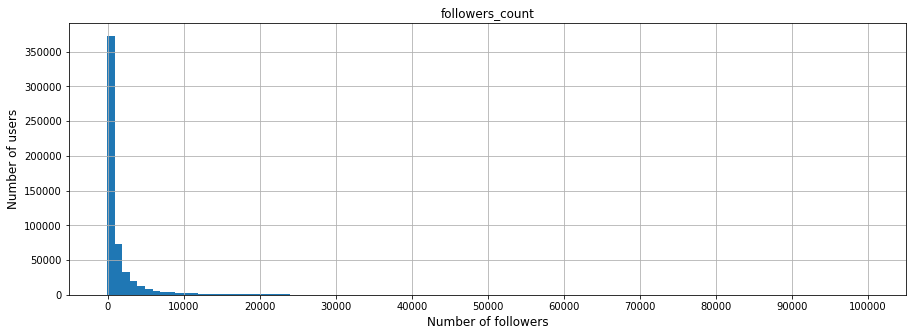

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df[df['followers_count'] < fol_max].hist(column='followers_count', bins=100, ax=ax)
plt.xticks(np.arange(0, fol_max+1, fol_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of followers",fontsize=12)

plt.show()

In [13]:
fr_max = 10000

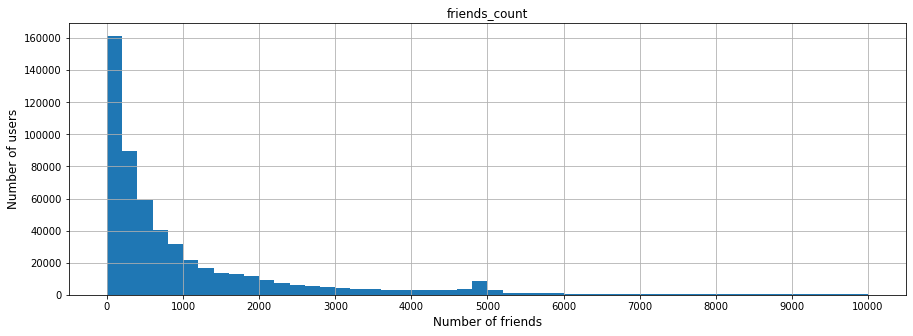

In [14]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['friends_count'] < fr_max].hist(column='friends_count', bins=50, ax=ax)
plt.xticks(np.arange(0, fr_max+1, fr_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of friends",fontsize=12)

plt.show()

In [15]:
status_max = 1000000

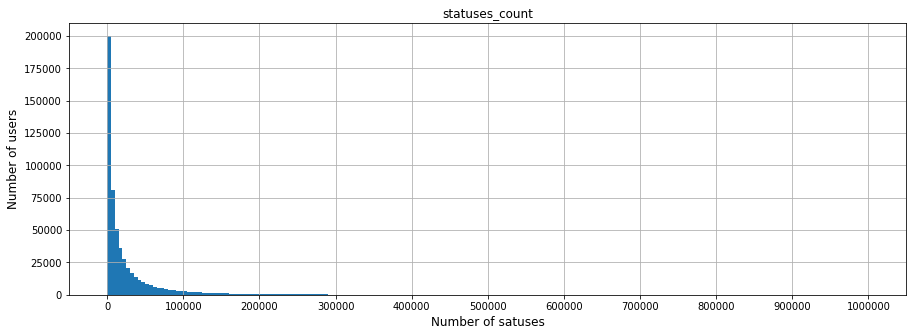

In [16]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['statuses_count'] < status_max].hist(column='statuses_count', bins=200, ax=ax)
plt.xticks(np.arange(0, status_max+1, status_max/10))

plt.xlabel("Number of satuses", fontsize=12)
plt.ylabel("Number of users",fontsize=12)

plt.show()

In [17]:
list_max = 5000

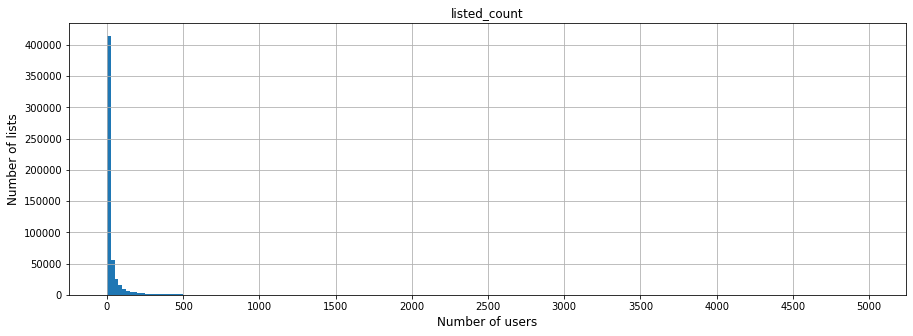

In [18]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['listed_count'] < list_max].hist(column='listed_count', bins=200, ax=ax)
plt.xticks(np.arange(0, list_max+1, list_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of lists",fontsize=12)

plt.show()

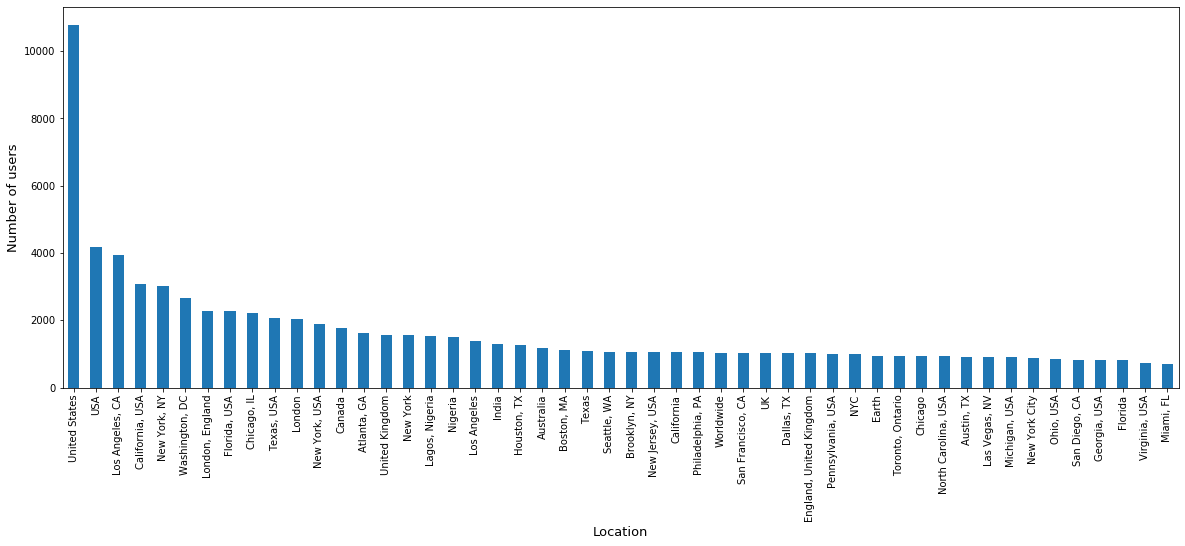

In [19]:
df["location"].value_counts()[:50].plot.bar(figsize=(20,7))

plt.xlabel("Location", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

In [20]:
dates = list(df['created_at'][~df['created_at'].isnull()].values)

In [21]:
created = []

for date in dates:
    created.append(date.split()[-1])

In [22]:
df['created_at'][0].split()[1]

'May'

In [23]:
df_year = pd.DataFrame(created, columns =['year']) 

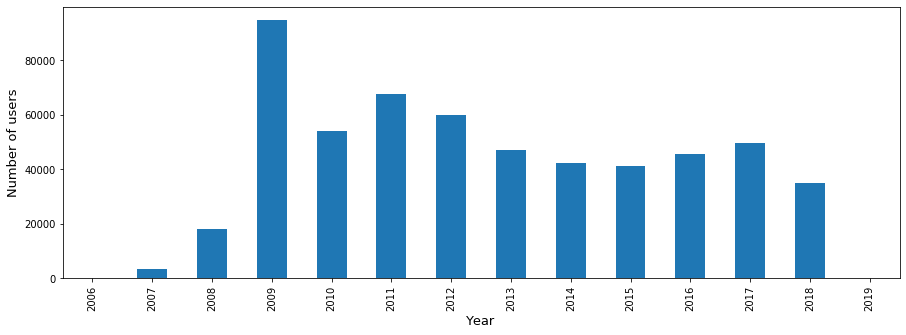

In [24]:
df_year['year'].groupby(df_year["year"]).count().plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

For unverified users, the decline we saw after 2009 is present, but is not as prominent as for verified users, since the slowdown in verficatiion of accounts does not affect unverified users

In [25]:
months = []

for date in dates:
    months.append(date.split()[1])

In [26]:
df_year['month'] = months

In [27]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

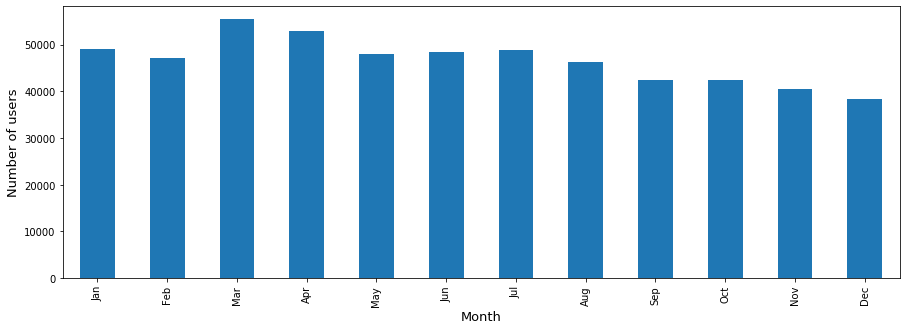

In [28]:
df_year['month'].groupby(df_year["month"]).count().loc[order].plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Month", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

In [29]:
# df.to_csv('datasets/unverified_features_500k.csv', index=False)